<a href="https://colab.research.google.com/github/IanQS/biol_497_neuromatch/blob/main/tutorials/W0D5_Statistics/student/W0D5_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Probability Distributions

**Week 0, Day 5: Probability & Statistics**

**By Neuromatch Academy**

__Content creators:__ Ulrik Beierholm

__Content reviewers:__ Natalie Schaworonkow, Keith van Antwerp, Anoop Kulkarni, Pooya Pakarian, Hyosub Kim

__Production editors:__ Ethan Cheng, Ella Batty

---
# Tutorial Objectives

We will cover the basic ideas from probability and statistics, as a reminder of what you have hopefully previously learned. These ideas will be important for almost every one of the following topics covered in the course.

There are many additional topics within probability and statistics that we will not cover as they are not central to the main course. We also do not have time to get into a lot of details, but this should help you recall material you have previously encountered.


By completing the exercises in this tutorial, you should:
* get some intuition about how stochastic randomly generated data can be
* understand how to model data using simple probability distributions
* understand the difference between discrete and continuous probability distributions
* be able to plot a Gaussian distribution

---
# Setup


In [ ]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "neuromatch-precourse",
            "user_key": "8zxfvwxw",
        },
    ).render()


feedback_prefix = "W0D5_T1"

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm  # the normal probability distribution

In [ ]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
from ipywidgets import interact, fixed, HBox, Layout, VBox, interactive, Label, interact_manual
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

In [ ]:
# @title Plotting Functions

def plot_random_sample(x, y, figtitle = None):
  """ Plot the random sample between 0 and 1 for both the x and y axes.

    Args:
      x (ndarray): array of x coordinate values across the random sample
      y (ndarray): array of y coordinate values across the random sample
      figtitle (str): title of histogram plot (default is no title)

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  plt.xlim([-0.25, 1.25]) # set x and y axis range to be a bit less than 0 and greater than 1
  plt.ylim([-0.25, 1.25])
  plt.scatter(dataX, dataY)
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_random_walk(x, y, figtitle = None):
  """ Plots the random walk within the range 0 to 1 for both the x and y axes.

    Args:
      x (ndarray): array of steps in x direction
      y (ndarray): array of steps in y direction
      figtitle (str): title of histogram plot (default is no title)

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  plt.plot(x,y,'b-o', alpha = 0.5)
  plt.xlim(-0.1,1.1)
  plt.ylim(-0.1,1.1)
  ax.set_xlabel('x location')
  ax.set_ylabel('y location')
  plt.plot(x[0], y[0], 'go')
  plt.plot(x[-1], y[-1], 'ro')

  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_hist(data, xlabel, figtitle = None, num_bins = None):
  """ Plot the given data as a histogram.

    Args:
      data (ndarray): array with data to plot as histogram
      xlabel (str): label of x-axis
      figtitle (str): title of histogram plot (default is no title)
      num_bins (int): number of bins for histogram (default is 10)

    Returns:
      count (ndarray): number of samples in each histogram bin
      bins (ndarray): center of each histogram bin
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Count')
  if num_bins is not None:
    count, bins, _ = plt.hist(data, bins = num_bins)
  else:
    count, bins, _ = plt.hist(data, bins = np.arange(np.min(data)-.5, np.max(data)+.6)) # 10 bins default
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()
  return count, bins


def my_plot_single(x, px):
  """
  Plots normalized Gaussian distribution

    Args:
        x (numpy array of floats):     points at which the likelihood has been evaluated
        px (numpy array of floats):    normalized probabilities for prior evaluated at each `x`

    Returns:
        Nothing.
  """
  if px is None:
      px = np.zeros_like(x)

  fig, ax = plt.subplots()
  ax.plot(x, px, '-', color='C2', linewidth=2, label='Prior')
  ax.legend()
  ax.set_ylabel('Probability')
  ax.set_xlabel('Orientation (Degrees)')
  plt.show()


def plot_gaussian_samples_true(samples, xspace, mu, sigma, xlabel, ylabel):
  """ Plot a histogram of the data samples on the same plot as the gaussian
  distribution specified by the give mu and sigma values.

    Args:
      samples (ndarray): data samples for gaussian distribution
      xspace (ndarray): x values to sample from normal distribution
      mu (scalar): mean parameter of normal distribution
      sigma (scalar): variance parameter of normal distribution
      xlabel (str): the label of the x-axis of the histogram
      ylabel (str): the label of the y-axis of the histogram

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  # num_samples = samples.shape[0]

  count, bins, _ = plt.hist(samples, density=True)
  plt.plot(xspace, norm.pdf(xspace, mu, sigma),'r-')
  plt.show()

---

# Section 1: Stochasticity and randomness

## Section 1.1: Intro to Randomness


In [ ]:
# @title Video 1: Stochastic World
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '-QwTPDp7-a8'), ('Bilibili', 'BV1sU4y1G7Qt')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Stochastic_World_Video")


Before trying out different probability distributions, let's start with the simple uniform distribution, U(a,b), which assigns equal probability to any value between a and b.

To show that we are drawing a random number $x$ from a uniform distribution with lower and upper bounds $a$ and $b$ we will use this notation:
$x \sim \mathcal{U}(a,b)$. Alternatively, we can say that all the potential values of $x$ are distributed as a uniform distribution between $a$ and $b$. $x$ here is a random variable: a variable whose value depends on the outcome of a random process.

### Coding Exercise 1.1: Create randomness

Numpy has many functions and capabilities related to randomness.  We can draw random numbers from various probability distributions. For example, to draw 5 uniform numbers between 0 and 100, you would use `np.random.uniform(0, 100, size = (5,))`.

 We will use `np.random.seed` to set a specific seed for the random number generator. For example, `np.random.seed(0)` sets the seed as 0. By including this, we are actually making the random numbers reproducible, which may seem odd at first. Basically if we do the below code without that 0, we would get different random numbers every time we run it. By setting the seed to 0, we ensure we will get the same random numbers. There are lots of reasons we may want randomness to be reproducible. In NMA-world, it's so your plots will match the solution plots exactly!

```python
np.random.seed(0)
random_nums = np.random.uniform(0, 100, size = (5,))
```

Below, you will complete a function `generate_random_sample` that randomly generates `num_points` $x$ and $y$ coordinate values, all within the range 0 to 1. You will then generate 10 points and visualize.

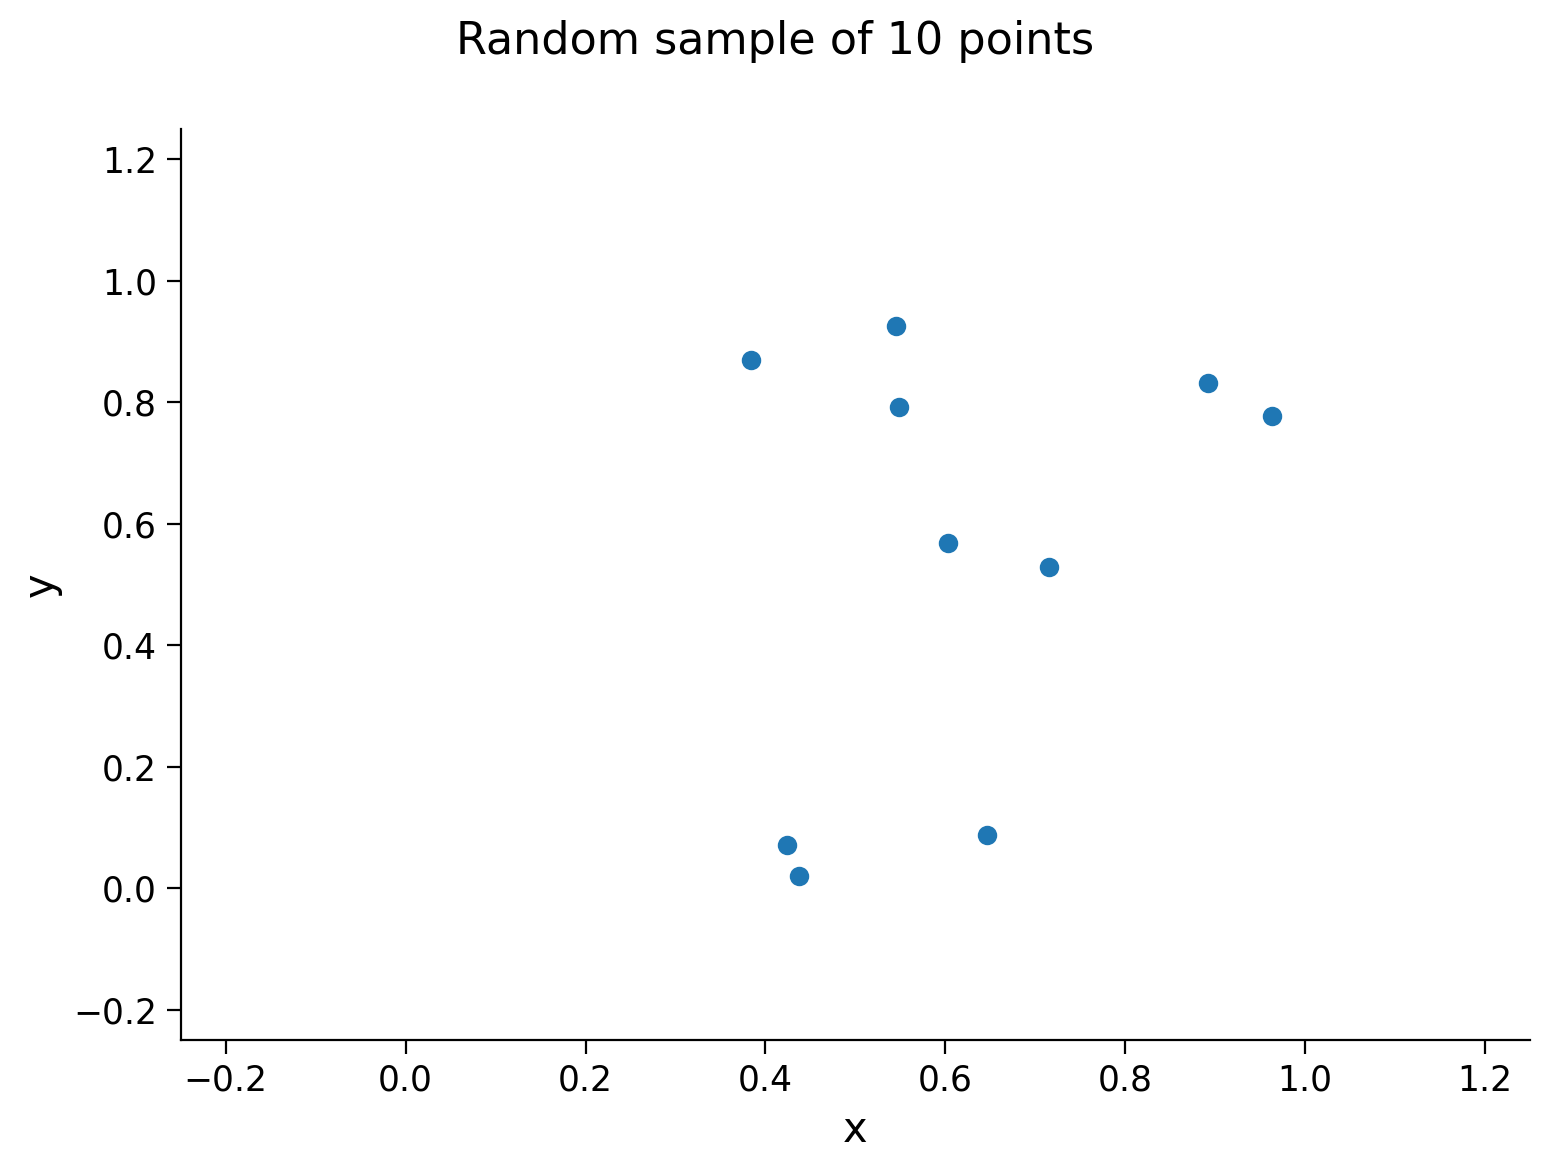

In [9]:
def generate_random_sample(num_points):
  """ Generate a random sample containing a desired number of points (num_points)
  in the range [0, 1] using a random number generator object.

  Args:
    num_points (int): number of points desired in random sample

  Returns:
    dataX, dataY (ndarray, ndarray): arrays of size (num_points,) containing x
    and y coordinates of sampled points

  """

  ###################################################################
  ## TODO for students: Draw the uniform numbers
  ## Fill out the following then remove
  # raise NotImplementedError("Student exercise: need to complete generate_random_sample")
  ###################################################################

  # Generate desired number of points uniformly between 0 and 1 (using uniform) for
  #     both x and y
  dataX = np.random.uniform(size=num_points)
  dataY = np.random.uniform(size=num_points)

  return dataX, dataY

# Set a seed
np.random.seed(0)

# Set number of points to draw
num_points = 10

# Draw random points
dataX, dataY = generate_random_sample(num_points)

# Visualize
plot_random_sample(dataX, dataY, "Random sample of 10 points")

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main/tutorials/W0D5_Statistics/solutions/W0D5_Tutorial1_Solution_0e972635.py)

*Example output:*

<img alt='Solution hint' align='left' width=777.0 height=586.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/precourse/main/tutorials/W0D5_Statistics/static/W0D5_Tutorial1_Solution_0e972635_0.png>



In [10]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Create_Randomness_Exercise")

### Interactive Demo 1.1: Random Sample Generation from Uniform Distribution
In practice this may not look very uniform, although that is of course part of the randomness! Uniform randomness does not mean smoothly uniform. When we have very little data it can be hard to see the distribution.

Below, you can adjust the number of points sampled with a slider. Does it look more uniform now? Try increasingly large numbers of sampled points.

In [11]:
#@markdown Make sure you execute this cell to enable the widget!

def generate_random_sample(num_points):
  """ Generate a random sample containing a desired number of points (num_points)
  in the range [0, 1] using a random number generator object.

  Args:
    num_points (int): number of points desired in random sample

  Returns:
    dataX, dataY (ndarray, ndarray): arrays of size (num_points,) containing x
    and y coordinates of sampled points

  """

  # Generate desired number of points uniformly between 0 and 1 (using uniform) for
  #     both x and y
  dataX = np.random.uniform(0, 1, size = (num_points,))
  dataY = np.random.uniform(0, 1, size = (num_points,))

  return dataX, dataY

@widgets.interact
def gen_and_plot_random_sample(num_points = widgets.SelectionSlider(options=[("%g"%i,i) for i in np.arange(0, 500, 10)])):

  dataX, dataY = generate_random_sample(num_points)
  fig, ax = plt.subplots()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  plt.xlim([-0.25, 1.25])
  plt.ylim([-0.25, 1.25])
  plt.scatter(dataX, dataY)
  fig.suptitle("Random sample of " + str(num_points) + " points", size=16)
  plt.show()

interactive(children=(SelectionSlider(description='num_points', options=(('0', np.int64(0)), ('10', np.int64(1…

In [12]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Random_Sample_Generation_from_Uniform_Distribution_Interactive_Demo")

## Section 1.2: Random walk



In [14]:
# @title Video 2: Random walk
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'Tz9gjHcqj5k'), ('Bilibili', 'BV11U4y1G7Bu')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [15]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Random_Walk_Video")

Stochastic models can be used to create models of behaviour. As an example, imagine that a rat is placed inside a novel environment, a box. We could try and model its exploration behaviour by assuming that for each time step it takes a random uniformly sampled step in any direction (simultaneous random step in x direction and random step in y direction)


### Coding Exercise 1.2: Modeling a random walk


Use the `generate_random_sample` function from above to obtain the random steps the rat takes at each time step and complete the generate_random_walk function below. For plotting, the box will be represented graphically as the unit square enclosed by the points $(0, 0)$ and $(1, 1)$.

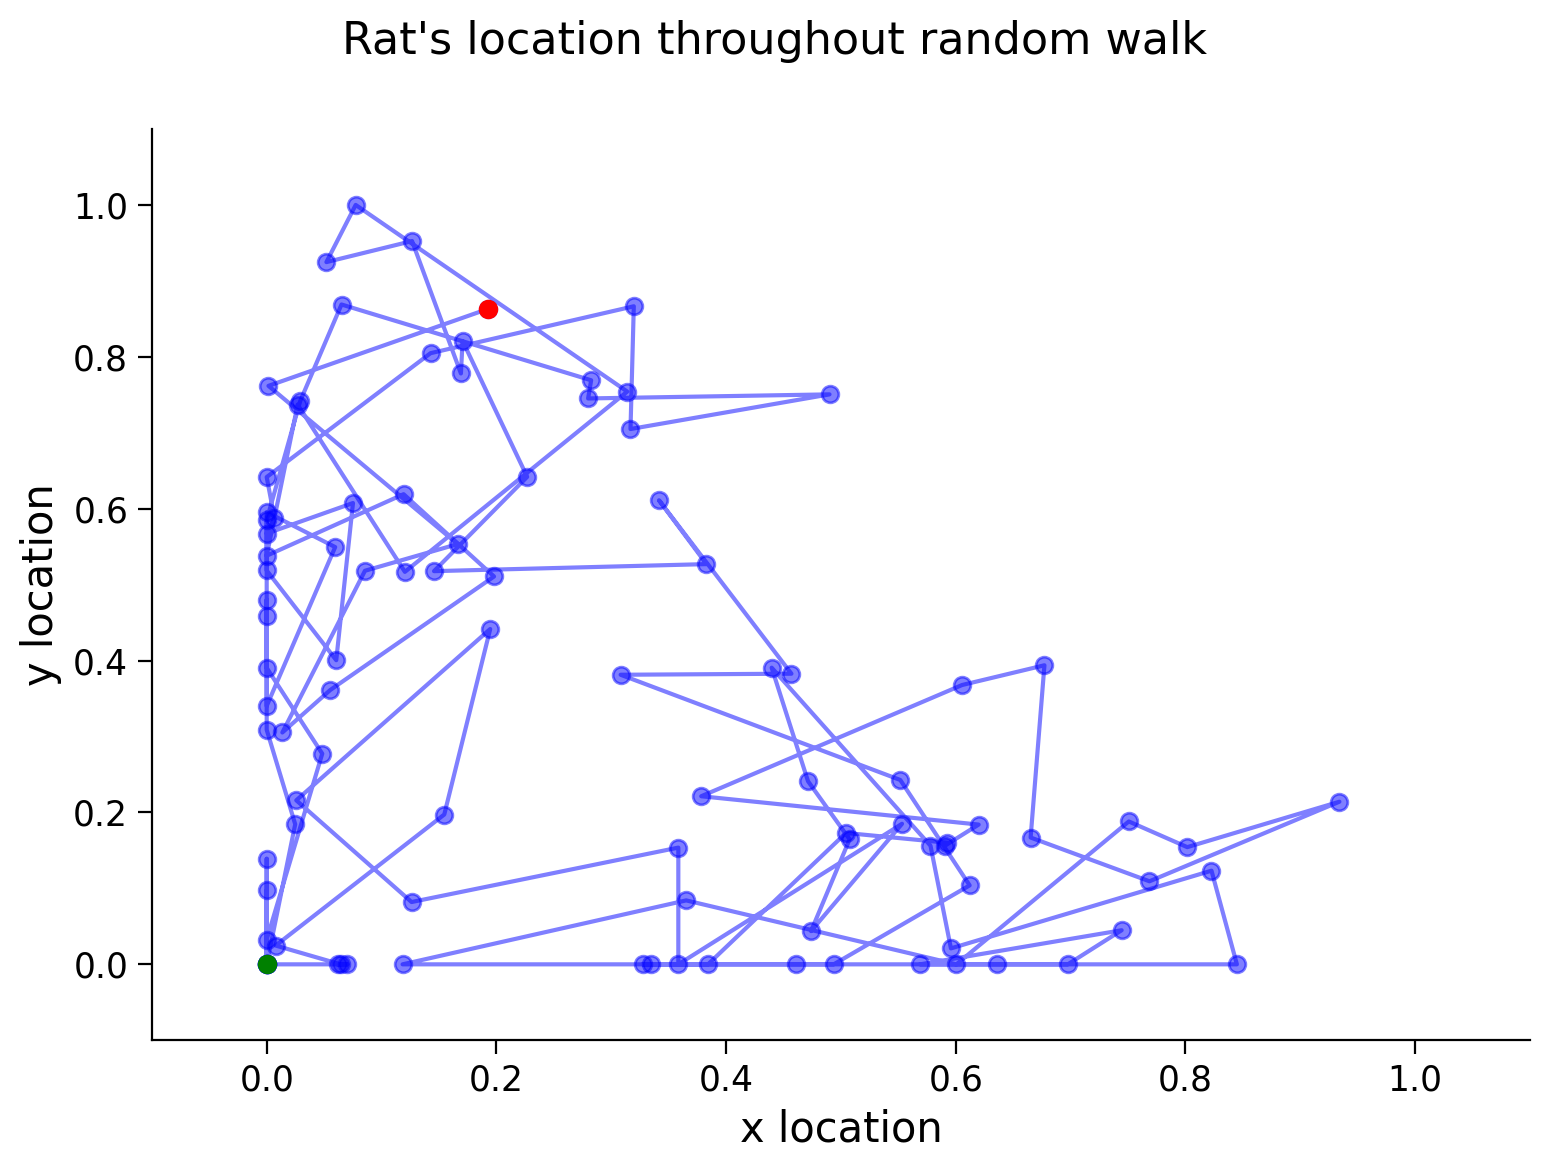

In [17]:
def generate_random_walk(num_steps, step_size):
  """ Generate the points of a random walk within a 1 X 1 box.

  Args:
    num_steps (int): number of steps in the random walk
    step_size (float): how much each random step size is weighted

  Returns:
    x, y (ndarray, ndarray): the (x, y) locations reached at each time step of the walk

  """
  x = np.zeros(num_steps + 1)
  y = np.zeros(num_steps + 1)

  ###################################################################
  ## TODO for students: Collect random step values with function from before
  ## Fill out the following then remove
  # raise NotImplementedError("Student exercise: need to complete generate_random_walk")
  ###################################################################

  # Generate the uniformly random x, y steps for the walk
  random_x_steps, random_y_steps = generate_random_sample(num_steps)

  # Take steps according to the randomly sampled steps above
  for step in range(num_steps):

    # take a random step in x and y. We remove 0.5 to make it centered around 0
    x[step + 1] = x[step] + (random_x_steps[step] - 0.5)*step_size
    y[step + 1] = y[step] + (random_y_steps[step] - 0.5)*step_size

    # restrict to be within the 1 x 1 unit box
    x[step + 1]= min(max(x[step + 1], 0), 1)
    y[step + 1]= min(max(y[step + 1], 0), 1)

  return x, y

# Set a random seed
np.random.seed(2)

# Select parameters
num_steps = 100   # number of steps in random walk
step_size = 0.5   # size of each step

# Generate the random walk
x, y = generate_random_walk(num_steps, step_size)

# Visualize
plot_random_walk(x, y, "Rat's location throughout random walk")

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main/tutorials/W0D5_Statistics/solutions/W0D5_Tutorial1_Solution_84dec82b.py)

*Example output:*

<img alt='Solution hint' align='left' width=777.0 height=586.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/precourse/main/tutorials/W0D5_Statistics/static/W0D5_Tutorial1_Solution_84dec82b_0.png>



We put a little green dot for the starting point and a red point for the ending point.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Modeling_a_random_walk_Exercise")

### Interactive Demo 1.2: Varying parameters of a random walk

In the interactive demo below, you can examine random walks with different numbers of steps or step sizes, using the sliders.


1.  What could an increased step size mean for the actual rat's movement we are simulating?
2. For a given number of steps, is the rat more likely to visit all general areas of the arena with a big step size or small step size?

In [19]:
# @markdown Make sure you execute this cell to enable the widget!

@widgets.interact(num_steps = widgets.IntSlider(value=100, min=0, max=500, step=1), step_size = widgets.FloatSlider(value=0.1, min=0.1, max=1, step=0.1))
def gen_and_plot_random_walk(num_steps, step_size):
  x, y = generate_random_walk(num_steps, step_size)
  plot_random_walk(x, y, "Rat's location throughout random walk")

interactive(children=(IntSlider(value=100, description='num_steps', max=500), FloatSlider(value=0.1, descripti…

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main/tutorials/W0D5_Statistics/solutions/W0D5_Tutorial1_Solution_d8b640f7.py)



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Varying_parameters_of_a_random_walk_Interactive_Demo")

In practice a uniform random movement is too simple an assumption. Rats do not move completely randomly; even if you could assume that, you would need to approximate with a more complex probability distribution.

Nevertheless, this example highlights how you can use sampling to approximate behaviour.

**Main course preview:** During [Hidden Dynamics day](https://compneuro.neuromatch.io/tutorials/W3D2_HiddenDynamics/chapter_title.html) we will see how random walk models can be used to also model accumulation of information in decision making.

---
# Section 2: Discrete distributions

## Section 2.1: Binomial distributions

In [20]:
# @title Video 3: Binomial distribution
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'kOXEQlmzFyw'), ('Bilibili', 'BV1Ev411W7mw')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [21]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Binomial_distribution_Video")

This video covers the Bernoulli and binomial distributions.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

The uniform distribution is very simple, and can only be used in some rare cases. If we only had access to this distribution, our statistical toolbox would be very empty. Thankfully we do have some more advanced distributions!

The uniform distribution that we looked at above is an example of a continuous distribution. The value of $X$ that we draw from this distribution can take **any value** between $a$ and $b$.

However, sometimes we want to be able to look at discrete events. Imagine that the rat from before is now placed in a T-maze, with food placed at the end of both arms. Initially, we would expect the rat to be choosing randomly between the two arms, but after learning it should choose more consistently.

A simple way to model such random behaviour is with a single **Bernoulli trial**, that has two outcomes, {$Left, Right$}, with probability $P(Left)=p$ and $P(Right)=1-p$ as the two mutually exclusive possibilities (whether the rat goes down the left or right arm of the maze).
</details>

The binomial distribution simulates $n$ number of binary events, such as the $Left, Right$ choices of the random rat in the T-maze. Imagine that you have done an experiment and found that your rat turned left in 7 out of 10 trials. What is the probability of the rat indeed turning left 7 times ($k = 7$)?

This is given by the binomial probability of $k$, given $n$ trials and probability $p$:

\begin{align}
P(k|n,p) &= \left( \begin{array} \\n \\ k\end{array} \right) p^k (1-p)^{n-k} \\
\binom{n}{k} &= {\frac {n!}{k!(n-k)!}}
\end{align}

In this formula, $p$ is the probability of turning left, $n$ is the number of binary events, or trials, and $k$ is the number of times the rat turned left. The term $\binom {n}{k}$ is the binomial coefficient.

This is an example of a *probability mass function*, which specifies the probability that a discrete random variable is equal to each value. In other words, how large a part of the probability space (mass) is placed at each exact discrete value. We require that all probability adds up to 1, i.e. that

\begin{equation}
\sum_k P(k|n,p)=1.
\end{equation}

Essentially, if $k$ can only be one of 10 values, the probabilities of $k$ being equal to each possible value have to sum up to 1 because there is a probability of 1 it will equal one of those 10 values (no other options exist).

If we assume an equal chance of turning left or right, then $p=0.5$. Note that if we only have a single trial $n=1$ this is equivalent to a single Bernoulli trial (feel free to do the math!).

### Think! 2.1: Binomial distribution sampling

We will draw a desired number of random samples from a binomial distribution, with $n = 10$ and $p = 0.5$. Each sample returns the number of trials, $k$, a rat turns left out of $n$ trials.

We will draw 1000 samples of this (so it is as if we are observing 10 trials of the rat, 1000 different times). We can do this using numpy: `np.random.binomial(n, p, size = (n_samples,))`

See below to visualize a histogram of the different values of $k$, or the number of times the rat turned left in each of the 1000 samples. In a histogram all the data is placed into bins and the contents of each bin is counted, to give a visualisation of the distribution of data. Discuss the following questions.

1. What are the x-axis limits of the histogram and why?
2. What is the shape of the histogram?
3. Looking at the histogram, how would you interpret the outcome of the simulation if you didn't know what p was? Would you have guessed p = 0.5?
3. What do you think the histogram would look like if the probability of turning left is 0.8 ($p = 0.8$)?

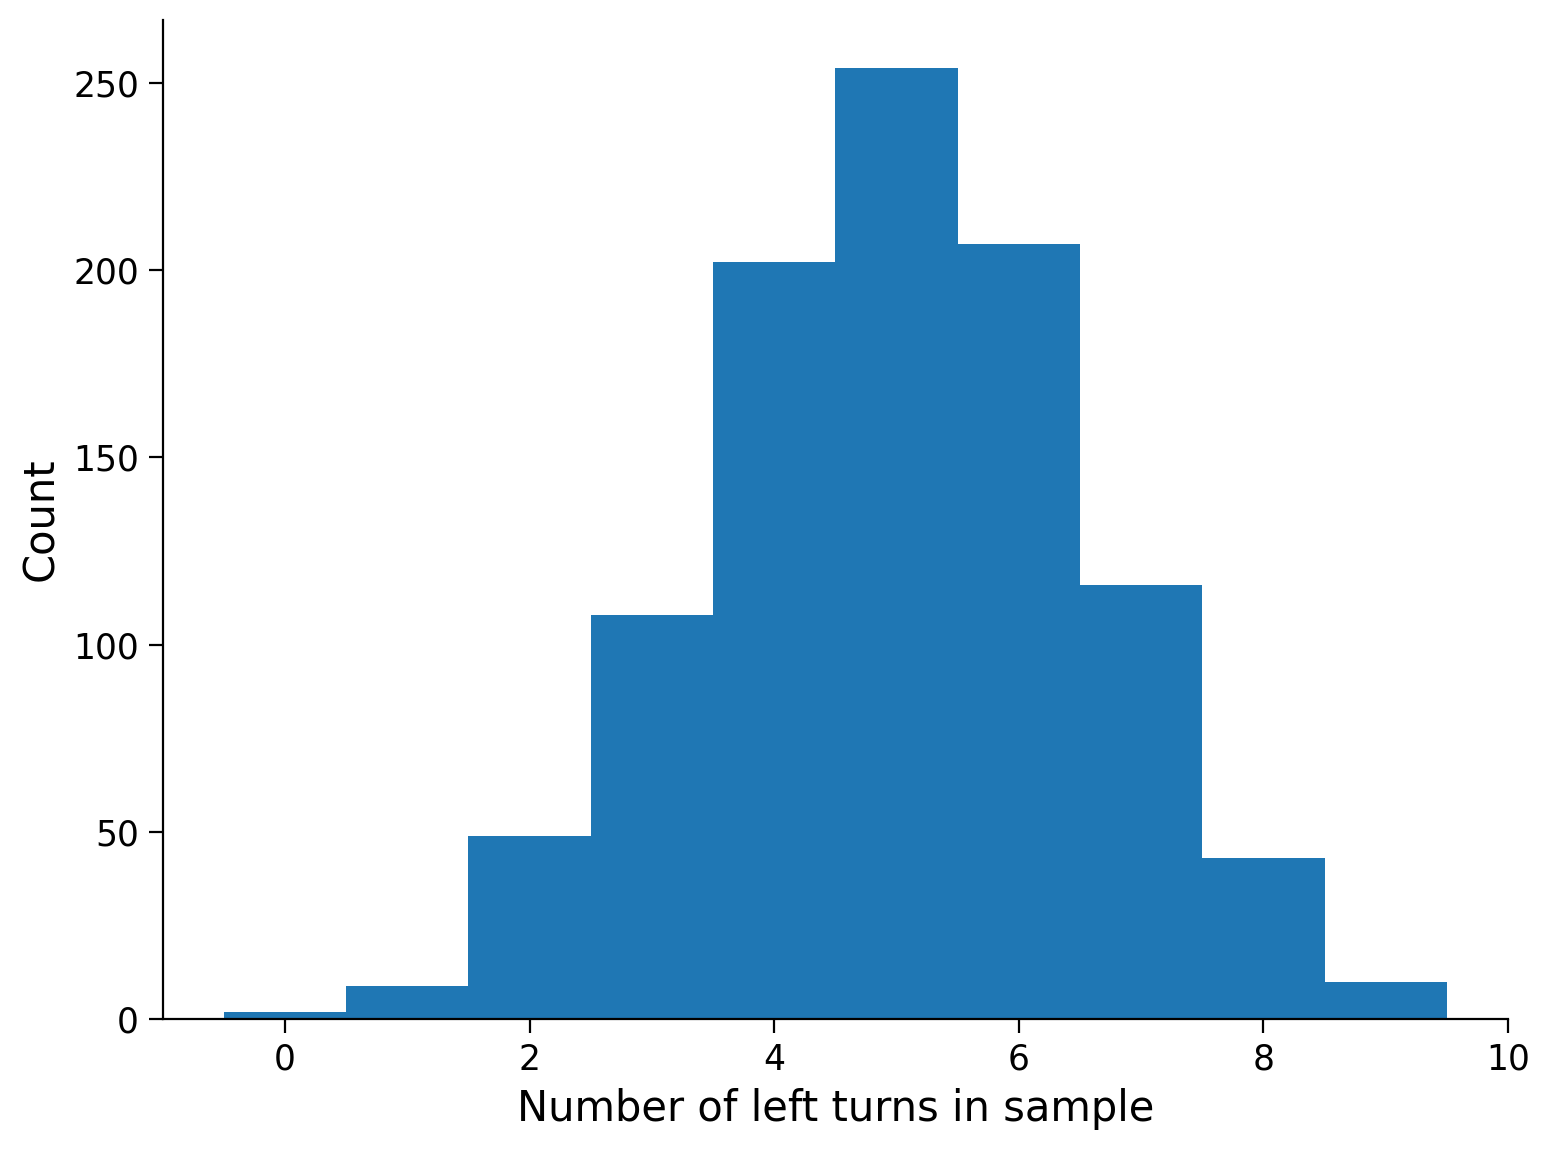

In [22]:
# @markdown Execute this cell to see visualization

# Select parameters for conducting binomial trials
n = 10
p = 0.5
n_samples = 1000

# Set random seed
np.random.seed(1)

# Now draw 1000 samples by calling the function again
left_turn_samples_1000 = np.random.binomial(n, p, size = (n_samples,))

# Visualize
count, bins = plot_hist(left_turn_samples_1000, 'Number of left turns in sample')

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main/tutorials/W0D5_Statistics/solutions/W0D5_Tutorial1_Solution_1ed83ff5.py)



In [23]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Binomial_distribution_Sampling_Discussion")

When working with the Bernoulli and binomial distributions, there are only 2 possible outcomes (in this case, turn left or turn right). In the more general case where there are $n$ possible outcomes (our rat is an n-armed maze) each with their own associated probability $p_1, p_2, p_3, p_4, ...$ , we use a **categorical distribution**. Draws from this distribution are a simple extension of the Bernoulli trial: we now have a probability for each outcome and draw based on those probabilities. We have to make sure that the probabilities sum to one:

\begin{equation}
\sum_i P(x=i)=\sum_i p_i =1
\end{equation}

If we sample from this distribution multiple times, we can then describe the distribution of outcomes from each sample as the **multinomial distribution**. Essentially, the categorical distribution is the multiple outcome extension of the Bernoulli, and the multinomial distribution is the multiple outcome extension of the binomial distribution. We'll see a bit more about this in the next tutorial when we look at Markov chains.

## Section 2.2: Poisson distribution

In [24]:
# @title Video 4: Poisson distribution
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'E_nvNb596DY'), ('Bilibili', 'BV1wV411x7P6')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [25]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Poisson_distribution_Video")

This video covers the Poisson distribution and how it can be used to describe neural spiking.

<details>
<summary> <font color='blue'>Click here for text recap of  video </font></summary>

For some phenomena there may not be a natural limit on the maximum number of possible events or outcomes.

The Poisson distribution is a '**point-process**', meaning that it determines the number of discrete 'point', or binary, events that happen within a fixed space or time, allowing for the occurence of a potentially infinite number of events. The Poisson distribution is specified by a single parameter $\lambda$ that encapsulates the mean number of events that can occur in a single time or space interval (there will be more on this concept of the 'mean' later!).

Relevant to us, we can model the number of times a neuron spikes within a time interval using a Poisson distribution. In fact, neuroscientists often do! As an example, if we are recording from a neuron that tends to fire at an average rate of 4 spikes per second, then the Poisson distribution specifies the distribution of recorded spikes over one second, where $\lambda=4$.

</details>

The formula for a Poisson distribution on $x$ is:

\begin{equation}
P(x)=\frac{\lambda^x e^{-\lambda}}{x!}
\end{equation}

where $\lambda$ is a parameter corresponding to the average outcome of $x$.

### Coding Exercise 2.2: Poisson distribution sampling

In the exercise below we will draw some samples from the Poisson distribution and see what the histogram looks.

In the code, fill in the missing line so we draw 5 samples from a Poisson distribution with $\lambda = 4$. Use `np.random.poisson`.

In [26]:
# Set random seed
np.random.seed(0)

# Draw 5 samples from a Poisson distribution with lambda = 4
sampled_spike_counts = np.random.poisson(lam=4, size=5)

# Print the counts
print("The samples drawn from the Poisson distribution are " +
          str(sampled_spike_counts))

The samples drawn from the Poisson distribution are [6 7 1 8 4]


[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main/tutorials/W0D5_Statistics/solutions/W0D5_Tutorial1_Solution_90422623.py)



You should see that the neuron spiked 6 times, 7 times, 1 time, 8 times, and 4 times in 5 different intervals.

In [27]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Poisson_distribution_sampling_Exercise")

### Interactive Demo 2.2: Varying parameters of Poisson distribution

Use the interactive demo below to vary $\lambda$ and the number of samples, and then visualize the resulting histogram.

1. What effect does increasing the number of samples have?  
2. What effect does changing $\lambda$ have?
3. With a small lambda, why is the distribution asymmetric?

In [28]:
# @markdown Make sure you execute this cell to enable the widget!

@widgets.interact(lambda_value = widgets.FloatSlider(value=4, min=0.1, max=10, step=0.1),
                  n_samples = widgets.IntSlider(value=5, min=5, max=500, step=1))

def gen_and_plot_possion_samples(lambda_value, n_samples):
  sampled_spike_counts = np.random.poisson(lambda_value, n_samples)
  count, bins = plot_hist(sampled_spike_counts, 'Recorded spikes per second')

interactive(children=(FloatSlider(value=4.0, description='lambda_value', max=10.0, min=0.1), IntSlider(value=5…

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main/tutorials/W0D5_Statistics/solutions/W0D5_Tutorial1_Solution_b5d0c82a.py)



In [29]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Varying_parameters_of_Poisson_distribution_Interactive_Demo")

---
# Section 3: Continuous distributions

In [30]:
# @title Video 5: Continuous distributions
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'LJ4Zdokb6lc'), ('Bilibili', 'BV1dq4y1L7eC')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

**Note:** There is a typo in the vido ~3.40, where the product of Gaussian distributions should be $\mathcal{N}(\mu_1, \sigma_1^2) \cdot \mathcal{N}(\mu_2, \sigma_2^2)$.

In [31]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Continuous_distributions_Video")

We do not have to restrict ourselves to only probabilistic models of discrete events. While some events in neuroscience are discrete (e.g., number of spikes by a neuron), many others are continuous (e.g., neuroimaging signals in EEG or fMRI, distance traveled by an animal, human pointing in the direction of a stimulus).

While for discrete outcomes, we can ask about the probability of a specific event ("What is the probability this neuron will fire 4 times in the next second"), this is not defined for a continuous distribution ("What is the probability of the BOLD signal being exactly 4.000120141..."). Hence we need to focus on intervals when calculating probabilities from a continuous distribution.

If we want to make predictions about possible outcomes ("I believe the BOLD signal from the area will be in the range $x_1$ to $ x_2 $"), we can use the integral $\int_{x_1}^{x_2} P(x)$.
$P(x)$ is now a **probability density function**, sometimes written as $f(x)$ to distinguish it from the probability mass functions.

With continuous distributions, we have to replace the normalizing sum

\begin{equation}
\sum_i P(x=p_i) = 1
\end{equation}

over all possible events, with an integral

\begin{equation}
\int_a^b P(x) = 1
\end{equation}

where a and b are the limits of the random variable $x$ (often $-\infty$ and $\infty$).

## Section 3.1: Gaussian Distribution

The most widely used continuous distribution is probably the Gaussian (also known as Normal) distribution. It is extremely common across all kinds of statistical analyses. Because of the central limit theorem, many quantities are Gaussian distributed. Gaussians also have some nice mathematical properties that permit simple closed-form solutions to several important problems.

As a working example, imagine that a human participant is asked to point in the direction where they perceived a sound coming from. As an approximation, we can assume that the variability in the direction/orientation they point towards is Gaussian distributed.

### Coding Exercise 3.1A: Gaussian Distribution

In this exercise, you will implement a Gaussian by filling in the missing portions of code for the function `my_gaussian` below. Gaussians have two parameters. The **mean** $\mu$, which sets the location of its center, and its "scale" or spread is controlled by its **standard deviation** $\sigma$, or **variance** $\sigma^2$ (i.e. the square of standard deviation). **Be careful not to use one when the other is required.**

The equation for a Gaussian probability density function is:

\begin{equation}
f(x;\mu,\sigma^2) = \mathcal{N}(\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)
\end{equation}

In Python $\pi$ and $e$ can be written as `np.pi` and `np.exp` respectively.

As a probability distribution this has an integral of one when integrated from $-\infty$ to $\infty$, however in the following your numerical Gaussian will only be computed over a finite number of points (for the cell below we will sample from -8 to 9 in step sizes of 0.1). You therefore need to explicitly normalize it to sum to one yourself.

Test out your implementation with a $\mu = -1$ and $\sigma = 1$.  

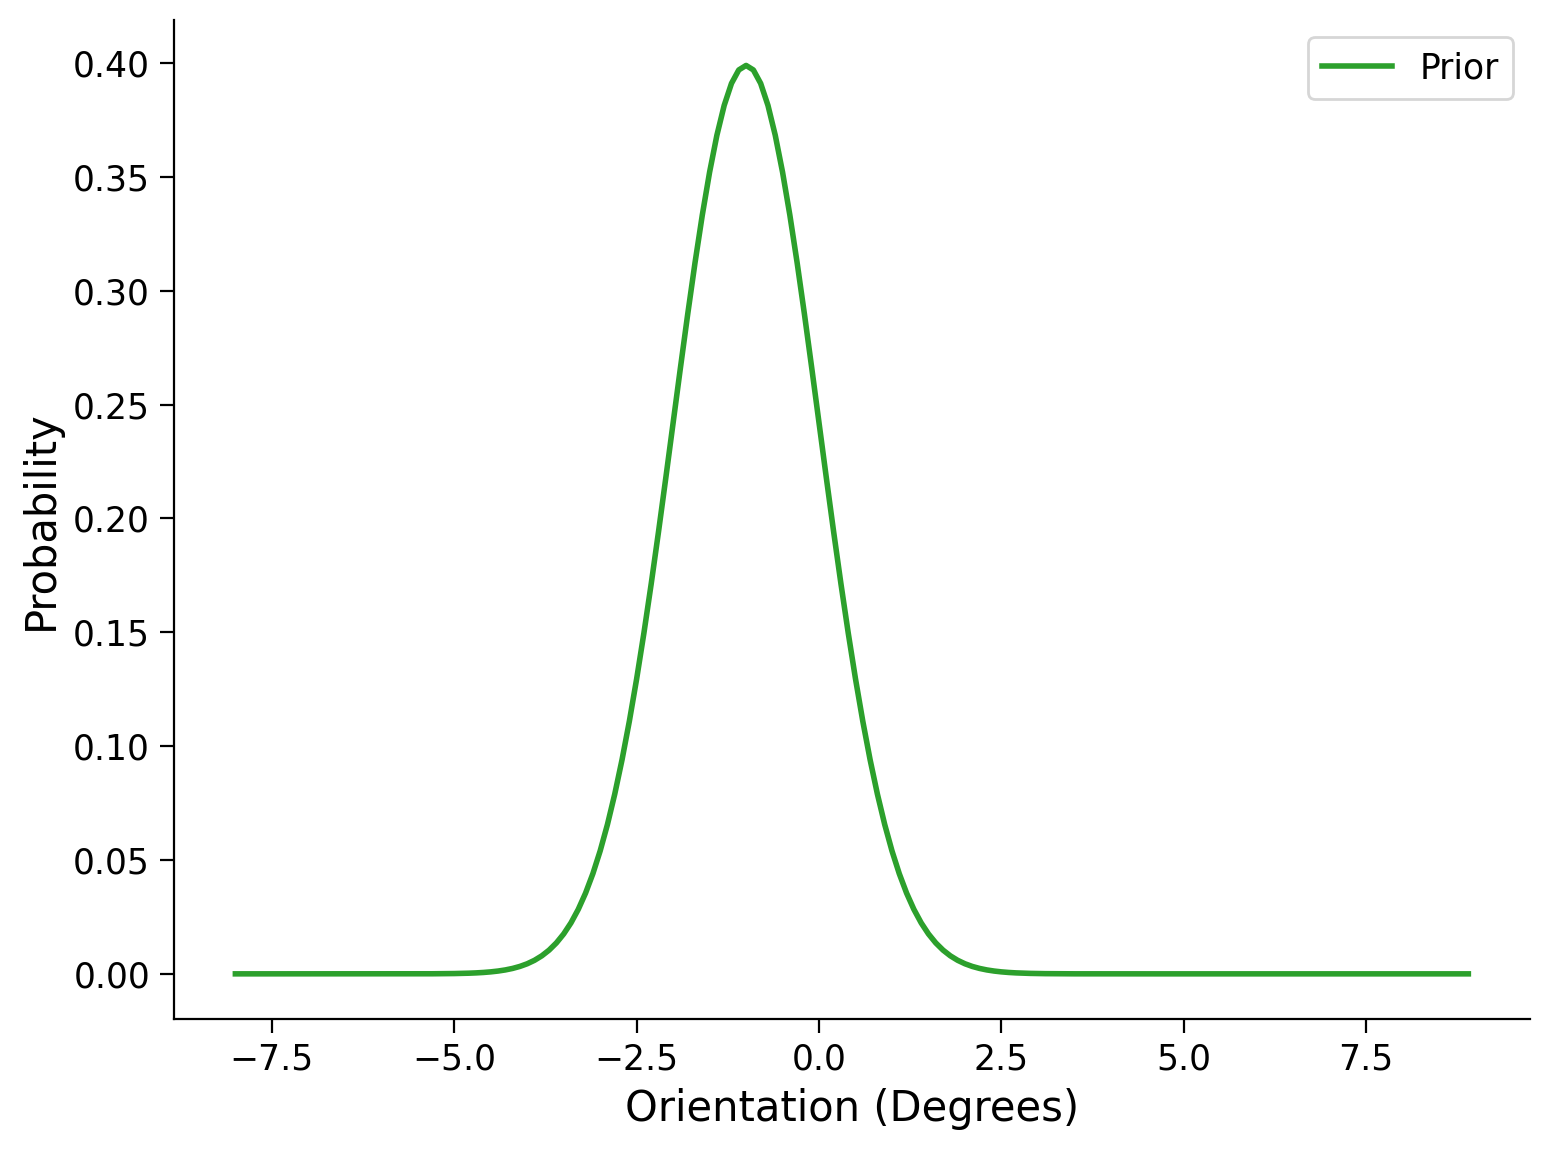

In [32]:
def my_gaussian(x_points, mu, sigma):
  """ Returns normalized Gaussian estimated at points `x_points`, with
  parameters: mean `mu` and standard deviation `sigma`

  Args:
      x_points (ndarray of floats): points at which the gaussian is evaluated
      mu (scalar): mean of the Gaussian
      sigma (scalar): standard deviation of the gaussian

  Returns:
      (numpy array of floats) : normalized Gaussian evaluated at `x`
  """

  ###################################################################
  ## TODO for students: Implement the formula for a Gaussian
  ## Add code to calculate the gaussian px as a function of mu and sigma,
  ## for every x in x_points
  ## Function Hints: exp -> np.exp()
  ##                 power -> z**2
  ##
  ## Fill out the following then remove
  # raise NotImplementedError("Student exercise: need to implement Gaussian")
  ###################################################################
  to_exp = - (x_points - mu) ** 2 / (2 * sigma ** 2)
  scaling = 1 / (np.sqrt(2 * np.pi * sigma**2))
  px = scaling * np.exp(to_exp)

  # as we are doing numerical integration we have to remember to normalise
  # taking into account the stepsize (0.1)
  px = px/(0.1*sum(px))
  return px

x = np.arange(-8, 9, 0.1)

# Generate Gaussian
px = my_gaussian(x, -1, 1)

# Visualize
my_plot_single(x, px)

[*Click for solution*](https://github.com/NeuromatchAcademy/precourse/tree/main/tutorials/W0D5_Statistics/solutions/W0D5_Tutorial1_Solution_2730515e.py)

*Example output:*

<img alt='Solution hint' align='left' width=777.0 height=577.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/precourse/main/tutorials/W0D5_Statistics/static/W0D5_Tutorial1_Solution_2730515e_0.png>



In [33]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Gaussian_Distribution_Exercise")

### Interactive Demo 3.1: Sampling from a Gaussian distribution

Now that we have gained a bit of intuition about the shape of the Gaussian, let's imagine that a human participant is asked to point in the direction of a sound source, which we then measure in horizontal degrees. To simulate that we draw samples from a Normal distribution:

\begin{equation}
x \sim \mathcal{N}(\mu,\sigma)
\end{equation}

We can sample from a Gaussian with mean $\mu$ and standard deviation $\sigma$ using `np.random.normal(mu, sigma, size = (n_samples,))`.

In the demo below, you can change the mean and standard deviation of the Gaussian, and the number of samples, we can compare the histogram of the samples to the true analytical distribution (in red).

1. With what number of samples would you say that the full distribution (in red) is well approximated by the histogram?
2. What if you just wanted to approximate the variables that defined the distribution, i.e., mean and variance?

In [34]:
#@markdown Make sure you execute this cell to enable the widget!


@widgets.interact(mean = widgets.FloatSlider(value=0, min=-5, max=5, step=0.5),
                  standard_dev = widgets.FloatSlider(value=0.5, min=0, max=10, step=0.1),
                  n_samples = widgets.IntSlider(value=5, min=1, max=300, step=1))
def gen_and_plot_normal_samples(mean, standard_dev, n_samples):
  x = np.random.normal(mean, standard_dev, size = (n_samples,))
  xspace = np.linspace(-20, 20, 100)
  plot_gaussian_samples_true(x, xspace, mean, standard_dev,
                            'orientation (degrees)', 'probability')

interactive(children=(FloatSlider(value=0.0, description='mean', max=5.0, min=-5.0, step=0.5), FloatSlider(val…

**Main course preview:** Gaussian distriutions are everywhere and are critical for filtering, [linear systems](https://compneuro.neuromatch.io/tutorials/W2D2_LinearSystems/chapter_title.html), [optimal control](https://compneuro.neuromatch.io/tutorials/W3D3_OptimalControl/chapter_title.html) and almost any statistical model of continuous data.

In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Sampling_from_a_Gaussian_distribution_Interactive_Demo")

---
# Summary

Across the different exercises you should now:
* have gotten some intuition about how stochastic randomly generated data can be
* understand how to model data using simple distributions
* understand the difference between discrete and continuous distributions
* be able to plot a Gaussian distribution

For more reading on these topics see just about any statistics textbook, or take a look at the [online resources](https://github.com/NeuromatchAcademy/precourse/blob/main/resources.md).